In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [62]:
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

<h3> Appendix I -- Data manipulation

<h4> Loading dataset

In [33]:
data = pd.read_csv('data.csv')
data.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [292]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=1)
y_train=data_train['Loan Status']
y_test_1=data_test['Loan Status']
X_train=data_train.drop('Loan Status',axis=1)
X_test_1=data_test.drop('Loan Status',axis=1)

In [293]:
X_test_1.shape

(13493, 34)

<h4> Pairplot

In [1]:
_ = sns.pairplot(data_train, diag_kind='kde', hue='Loan Status')

<h4> Change non numerical variables into numerical variables

In [294]:
X_train.dtypes.index[X_train.dtypes == 'object']

Index(['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration',
       'Verification Status', 'Payment Plan', 'Loan Title',
       'Initial List Status', 'Application Type'],
      dtype='object')

By observing the original dataset, we can see that the columns of "Batch Enrolled", "Grade", "Sub Grade", "Employment Duration", "Verification Status", "Payment Plan", "Loan Title", "Initial List Status" and "Application Type" are non numerical variables. We change them into numerical format first.

In [295]:
# identify the class of payment plan
X_train['Payment Plan'].unique()

array(['n'], dtype=object)

In [296]:
# identify the class of application type
X_train['Application Type'].unique()

array(['INDIVIDUAL', 'JOINT'], dtype=object)

In [297]:
# numeric Application type
le = preprocessing.LabelEncoder()
X_train['Application Type']=le.fit_transform(X_train['Application Type'])

In [299]:
# identify the class of Loan Title
X_train['Loan Title'].unique()

array(['Home improvement', 'Debt consolidation',
       'Credit card refinancing', 'Other', 'Debt Free', 'Major purchase',
       'Debt Consolidation', 'Credit Card', 'Credit Card Consolidation',
       'Medical expenses', 'Credit Card Payoff', 'House', 'consolidate',
       'Debt Consolidation 2013', 'Credit payoff', 'payoff', 'Business',
       'Loan', 'loan1', 'Lending Club', 'Personal Loan',
       'Moving and relocation', 'Debt Consolidation Loan',
       'home improvement', 'consolidation', 'Bill Payoff',
       'debt consolidation', 'Vacation', 'conso', 'Car financing',
       'Dept consolidation', 'Credit Consolidation', 'Consolidate',
       'Consolidation', 'Pay Off', 'get out of debt', 'Green loan',
       'debt', 'debt consolidation loan', 'CC Consolidation',
       'Credit Card Refinance', 'Debt', 'Cards', 'CONSOLIDATION',
       'credit card refinance', 'Consolidation Loan',
       'Credit card refinance', 'Lending loan', 'Refinance', 'MYLOAN',
       'Get Debt Free', 'co

In [300]:
# identify the class of grade
X_train['Grade'].unique()

array(['C', 'B', 'A', 'D', 'F', 'E', 'G'], dtype=object)

In [301]:
# numeric variables
grade_dict = {
    'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3, 'E': 4,
    'F' : 5, 'G' : 6
}
X_train = X_train.replace(grade_dict)

In [302]:
# identify the class of subgrade
X_train['Sub Grade'].unique()

array(['D3', 'D4', 'E5', 'D1', 'B2', 'B5', 'E2', 'E1', 'B4', 'D5', 'A3',
       'C5', 'C1', 'E3', 'G5', 'C3', 'B3', 'C4', 'B1', 'F1', 'A4', 'A2',
       'C2', 'D2', 'F2', 'A1', 'A5', 'F4', 'F3', 'E4', 'G4', 'G1', 'G3',
       'G2', 'F5'], dtype=object)

In [303]:
# numeric sub grade
subgrade_dict = {
    'A1' : 0, 'A2' : 1, 'A3' : 2, 'A4' : 3, 'A5': 4,
    'B1' : 5, 'B2' : 6, 'B3' : 7, 'B4' : 8, 'B5': 9,
    'C1' : 10, 'C2': 11, 'C3': 12, 'C4': 13, 'C5': 14,
    'D1' : 15, 'D2': 16, 'D3': 17, 'D4': 18, 'D5': 19,
    'E1' : 20, 'E2': 21, 'E3': 22, 'E4': 23, 'E5': 24,
    'F1' : 25, 'F2': 26, 'F3': 27, 'F4': 28, 'F5': 29,
    'G1' : 30, 'G2': 31, 'G3': 32, 'G4': 33, 'G5': 34,
}
X_train = X_train.replace(subgrade_dict)

In [304]:
# numeric Employment Duration
le = preprocessing.LabelEncoder()
X_train['Employment Duration']=le.fit_transform(X_train['Employment Duration'])

In [305]:
# numetric Verification Status
X_train['Verification Status']=le.fit_transform(X_train['Verification Status'])

In [306]:
le = preprocessing.LabelEncoder()
X_train['Initial List Status']=le.fit_transform(X_train['Initial List Status'])

In [307]:
X_train['Batch Enrolled']=le.fit_transform(X_train['Batch Enrolled'])

For the above 9 features, "Batch Enrolled", "Grade", "Sub Grade", "Employment Duration", "Verification Status", "Payment Plan", "Loan Title", "Initial List Status" and "Application Type", we check the uniqueness and values. 
1. transfer 'Application Type', 'Grade', 'Sub Grade', 'Employment Duration', 'Verification Status', 'Batch Enrolled', 'Initial List Status', 7 features to numeric data type. 
2. Delete 'Payment Plan' feature, since all the samples have the same 'Payment Plan' value. 
3. Delete 'Loan Title' feature. Since this feature were written by borrowers, there is no standard rule to write down, so the values are various and vague meaning. 

In [308]:
X_train = X_train.drop(['Payment Plan', 'Loan Title'], axis=1)

<h4> Checking the mising value

In [309]:
X_train.isna().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay                   0
Accounts Delinquent             0
Total Collecti

We can see that the dataset contains no missing value.

<h4> intuitive

In [310]:
X_train.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Debit to Income', 'Delinquency - two years', 'Inquires - six months',
       'Open Account', 'Public Record', 'Revolving Balance',
       'Revolving Utilities', 'Total Accounts', 'Initial List Status',
       'Total Received Interest', 'Total Received Late Fee', 'Recoveries',
       'Collection Recovery Fee', 'Collection 12 months Medical',
       'Application Type', 'Last week Pay', 'Accounts Delinquent',
       'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit'],
      dtype='object')

In [311]:
X_train['Accounts Delinquent'].unique()

array([0], dtype=int64)

For the other features except above 9 features, by intuition and check the uniqueness, we can drop the variable 'ID', 'Accounts Delinquent'
1. 'ID' indicates the unique ID of representative, which is meaning less to our following analysis.
2. the value 'Accounts Delinquent' for each sample is the same, so delete it. 

In [312]:
X_train = X_train.drop(columns=["ID",'Accounts Delinquent'])

<h4> change to categorical data

In [313]:
X_train['Term'].unique()

array([58, 59, 36], dtype=int64)

In [314]:
le = preprocessing.LabelEncoder()
X_train['Term']=le.fit_transform(X_train['Term'])

Checking the uniqueness and meaning of features, change some features to categorical data. 
1. 'Term' has three categories, so change to catergorical data. 

<h4> correlation

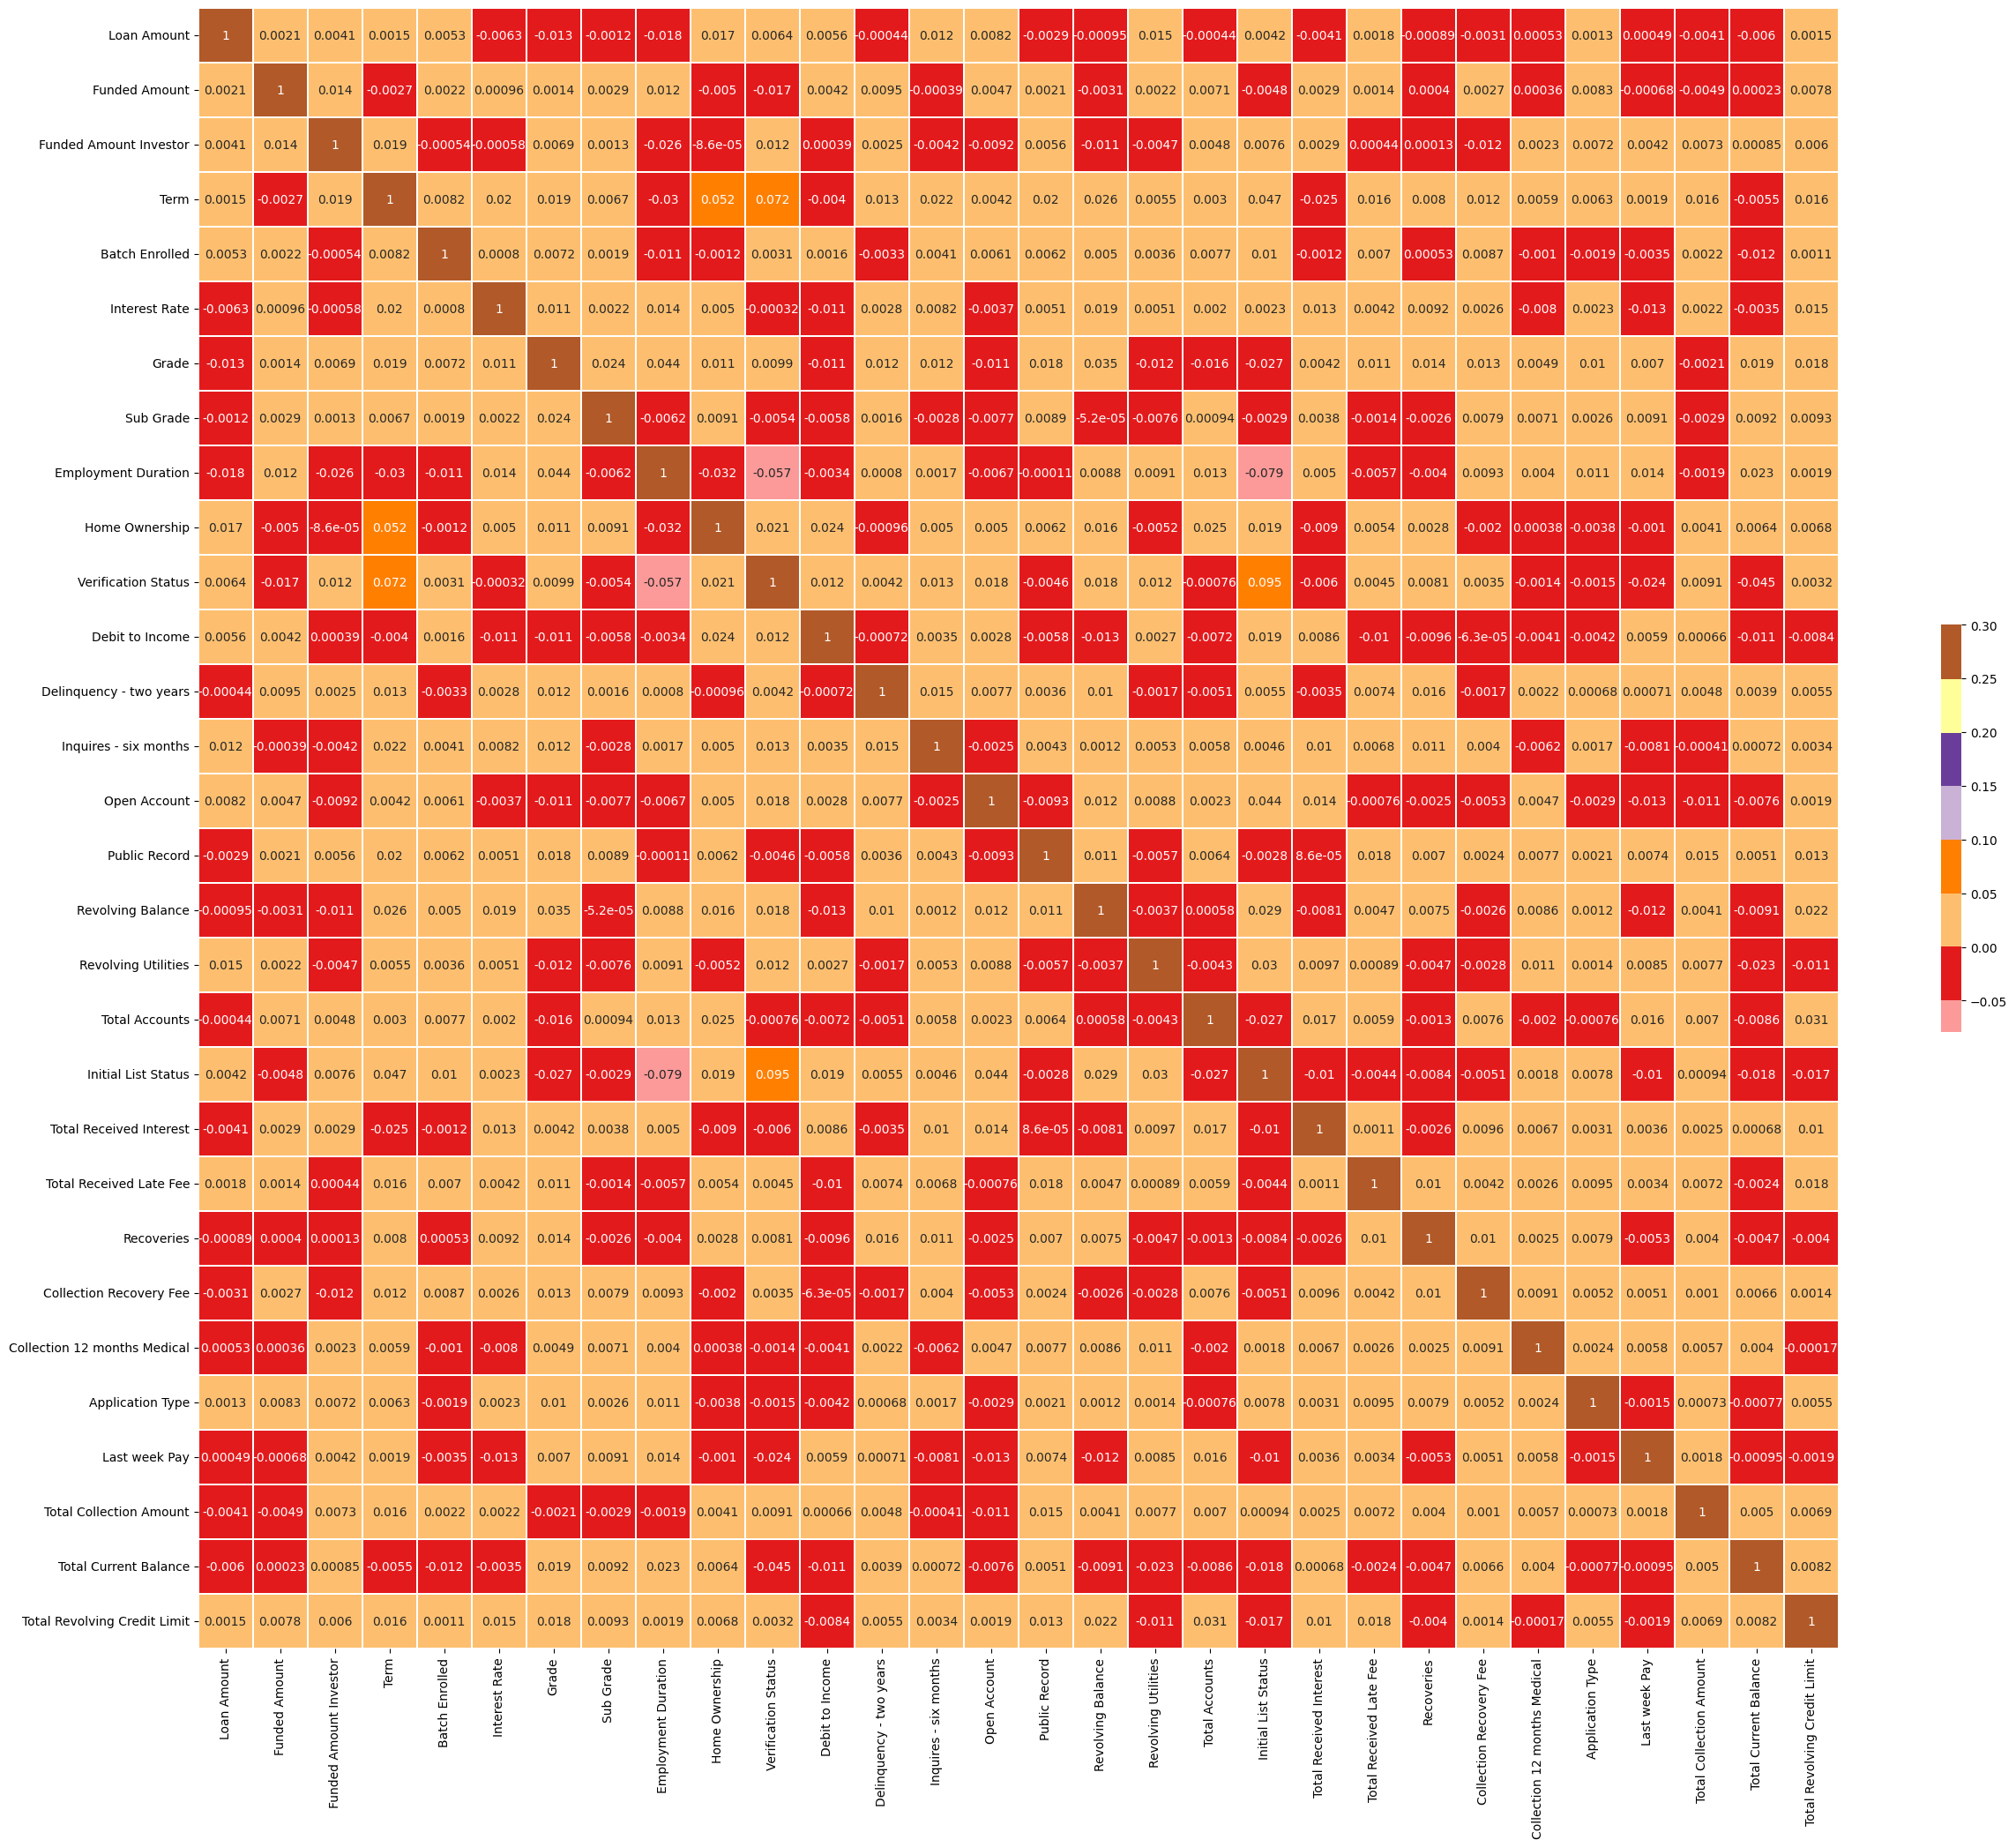

In [315]:
def corr_matrix(df):
  corr = df.corr()
  f, ax = plt.subplots(figsize=(30,30))
  sns.heatmap(corr,  cmap="Paired", vmax=.3, center=0,
              square=True, annot= True, linewidths=.1, cbar_kws={"shrink": 0.2})

corr_matrix(X_train)

The correlations bewteen each features are pretty small. We don't delete any features in this step.

<h3> similiar procedure to the testing dataset

After similar exploration, we conduct the following preprocessing to the test data.
1. Transfer 'Grade', 'Sub Grade', 'Application Type', 'Employment Duration', 'Verification Status', 'Batch Enrolled', 'Initial List Status', 'Term' these 8 features into numeric data type. 
by intuition and check the uniqueness, we can drop the variable Payment Plan', 'Loan Title', 'ID' and 'Accounts Delinquent'.
1. 'ID' indicates the unique ID of representative, which is meaning less to our following analysis.
2. the value 'Accounts Delinquent' for each sample is the same, so delete it. 
3. Delete 'Payment Plan' feature, since all the samples have the same 'Payment Plan' value. 
4. Delete 'Loan Title' feature. Since this feature were written by borrowers, there is no standard rule to write down, so the values are various and vague meaning. 

In [316]:
grade_dict = {
    'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3, 'E': 4,
    'F' : 5, 'G' : 6
}
X_test_1 = X_test_1.replace(grade_dict)
subgrade_dict = {
    'A1' : 0, 'A2' : 1, 'A3' : 2, 'A4' : 3, 'A5': 4,
    'B1' : 5, 'B2' : 6, 'B3' : 7, 'B4' : 8, 'B5': 9,
    'C1' : 10, 'C2': 11, 'C3': 12, 'C4': 13, 'C5': 14,
    'D1' : 15, 'D2': 16, 'D3': 17, 'D4': 18, 'D5': 19,
    'E1' : 20, 'E2': 21, 'E3': 22, 'E4': 23, 'E5': 24,
    'F1' : 25, 'F2': 26, 'F3': 27, 'F4': 28, 'F5': 29,
    'G1' : 30, 'G2': 31, 'G3': 32, 'G4': 33, 'G5': 34,
}
X_test_1 = X_test_1.replace(subgrade_dict)

In [317]:
le = preprocessing.LabelEncoder()
X_test_1['Application Type']=le.fit_transform(X_test_1['Application Type'])
X_test_1['Employment Duration']=le.fit_transform(X_test_1['Employment Duration'])
X_test_1['Verification Status']=le.fit_transform(X_test_1['Verification Status'])
X_test_1['Batch Enrolled']=le.fit_transform(X_test_1['Batch Enrolled'])
X_test_1['Initial List Status']=le.fit_transform(X_test_1['Initial List Status'])
X_test_1['Term']=le.fit_transform(X_test_1['Term'])

X_test_1 = X_test_1.drop(['Payment Plan', 'Loan Title'], axis=1)
X_test_1 = X_test_1.drop(columns=["ID",'Accounts Delinquent'])

In [359]:
X_train.to_csv('X_train_EDA.csv')
y_train.to_csv('y_train_EDA.csv')
X_test_1.to_csv('X_test_EDA.csv')
y_test_1.to_csv('y_test_EDA.csv')

<h3> Imbalanced Data: Downsampling

In [318]:
N_class0 = len(np.where(y_train==0)[0])
N_class1 = len(np.where(y_train==1)[0])
print(N_class0, N_class1)

48977 4993


The training set has 48977 negative samples (the target y=0) and 4993 positive samples (the target y=1), the ratio of the two classes is nearly 10:1, which indicates that the training data is quite imbalanced, and this needs us to do some modification before modeling.
Here we choose to downsample the majority class (y=0).  Downsampling  improves the balance to 1 positive to 3 negatives (3.33%).

In [319]:
X_test_1.shape

(13493, 30)

In [141]:
# class0_sampleclass0_sample = X_train[y_train==0].sample(n=4*N_class1)
# # class1_sample = X_train[y_train==1].sample(n=3*N_class1)
# train_X = pd.concat([class0_sample, X_train[y_train==1], X_train[y_train==1],X_train[y_train==1],X_train[y_train==1]])
# train_y = y_train[train_X.index]
# print(train_X.shape, train_y.shape)

(39944, 30) (39944,)


In [361]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler()
train_X, train_y = sampler.fit_resample(X_train,y_train)

In [362]:
train_X, X_test, train_y,  y_test = train_test_split(train_X, train_y, test_size=0.3, random_state=1)

In [363]:
train_X.to_csv('X_train_oversample.csv')
train_y.to_csv('y_train_oversample.csv')
X_test.to_csv('X_test_oversample.csv')
y_test.to_csv('y_test_oversample.csv')

In [364]:
N_class0 = len(np.where(y_test==0)[0])
N_class1 = len(np.where(y_test==1)[0])
print(N_class0, N_class1)

14758 14629


In [365]:
train_xy = pd.concat([X_test,  y_test],axis =1)
train_xy

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
45198,11521,5738,12352.463770,2,24,6.422222,4,17,2,38558.09428,...,0.030346,0.891992,0.976602,0,0,37,49,44909,16305,0
34246,22588,14889,11731.709540,2,25,21.955545,3,14,0,35120.12847,...,0.134912,5.273666,0.163510,0,0,34,17,71928,10471,0
36699,10735,9246,23886.819380,2,7,8.918593,1,3,2,96247.14884,...,0.011785,9.423905,1.145993,0,0,76,23,28404,27729,0
37166,14211,2849,11738.817520,2,25,11.713666,2,13,2,310943.14100,...,0.016409,0.177785,1.166274,0,0,68,35,150837,7083,0
71371,16869,9309,9084.000986,1,0,20.055314,2,10,1,127713.75660,...,0.009074,4.739649,0.415746,0,0,112,25,181859,4344,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24654,18165,9335,16642.106980,2,26,13.434621,3,13,2,45440.00802,...,0.010055,6.773740,1.365583,0,0,81,41,37191,26329,0
88862,11439,16904,26730.955720,2,16,9.407017,0,12,2,88396.40571,...,0.051735,4.075170,0.978984,0,0,14,50,522615,19929,1
56165,24045,8998,10037.839080,2,0,9.109701,1,23,0,90309.41763,...,0.096675,0.383470,0.768404,0,0,8,29,252066,35743,1
80592,3746,7852,15738.088480,2,22,14.771145,3,3,0,52466.88016,...,0.056872,2.966445,0.344554,0,0,38,14,384713,8430,1


In [366]:
class1_sample = train_xy[train_xy['Loan Status']==1].sample(n=1400)
aaaa = pd.concat([class1_sample, train_xy[train_xy['Loan Status']==0]])
X_test = aaaa.drop(columns=['Loan Status'])
# class1_sample = X_train[y_train==1].sample(n=3*N_class1)
y_test = aaaa['Loan Status']

In [367]:
N_class0 = len(np.where(y_test==0)[0])
N_class1 = len(np.where(y_test==1)[0])
print(N_class0, N_class1)

14758 1400


In [368]:
cccc = pd.concat([X_test_1,  y_test_1],axis =1)
bbbb = pd.concat([aaaa.sample(n=8000), cccc.sample(n=5493)])
X_test = bbbb.drop(columns=['Loan Status'])
y_test = bbbb['Loan Status']

In [369]:
X_test.to_csv('X_test_model.csv')
y_test.to_csv('y_test_model.csv')

The reasons why do not choose the downsample:
1. after downsample, the training sample size is decreased, we will lose some information
2. the data is various and overlap with each other, oversample could help to increase the balance of label 1. 

<h3> Model

<h4> Logistic Regression

In [327]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(train_X, train_y)

LogisticRegression()

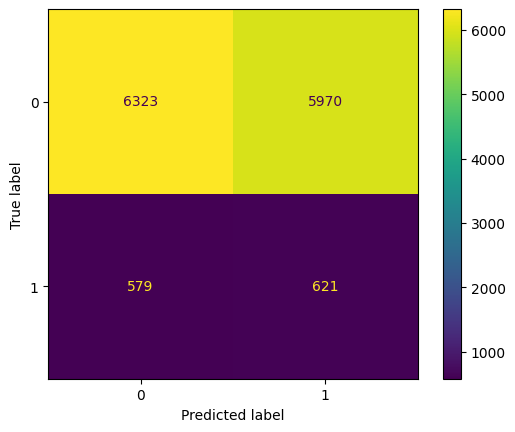

In [328]:
# confusion matrix 
y_pred = log_model.predict(X_test)
cm_test_logmodel = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_test_logmodel, display_labels = log_model.classes_)
cm_display.plot();

In [329]:
# F1 score
f1_score_logmodel = f1_score(y_test, y_pred)
# precision
precision_logmodel = precision_score(y_test, y_pred)
# recall
recall_logmodel = recall_score(y_test, y_pred)
# accruacy
accuracy_logmodel = log_model.score(X_test, y_test)

In [330]:
y_train_test_prob = log_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_train_test_prob[:,1], pos_label=1)
roc_auc =  auc(fpr, tpr)
roc_auc

0.518435085007728

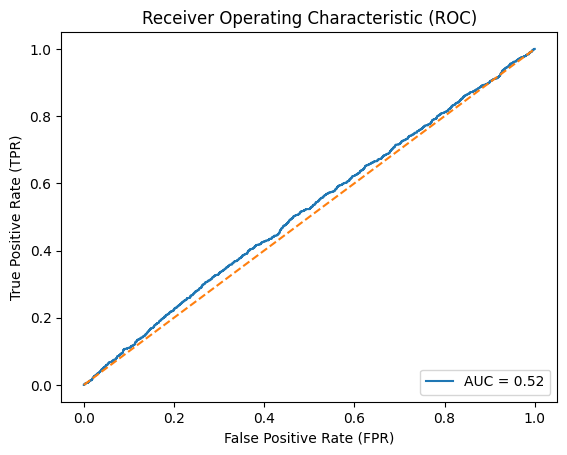

In [331]:
plt.plot(fpr,tpr,label= 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'--')  # plot a diagonal line from the lower left to the upper right
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

<h4> Random Forest

In [334]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(train_X, train_y)

RandomForestClassifier()

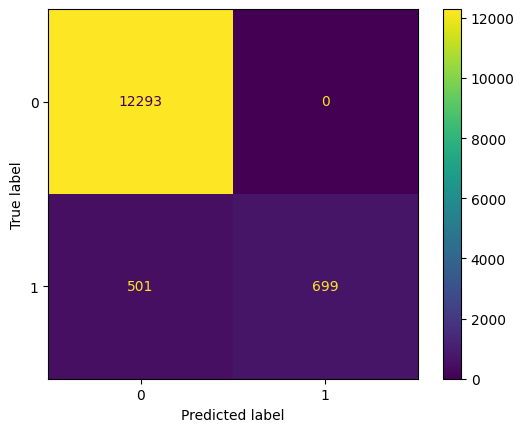

In [335]:
# confusion matrix 
y_pred = rf_model.predict(X_test)
cm_test_rfmodel = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_test_rfmodel, display_labels = rf_model.classes_)
cm_display.plot();

In [336]:
# F1 score
f1_score_rfmodel = f1_score(y_test, y_pred)
# precision
precision_rfmodel = precision_score(y_test, y_pred)
# recall
recall_rfmodel = recall_score(y_test, y_pred)
# accruacy
accuracy_rfmodel = rf_model.score(X_test, y_test)

In [337]:
y_train_test_prob = rf_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_train_test_prob[:,1], pos_label=1)
roc_auc =  auc(fpr, tpr)
roc_auc

0.7921792212370183

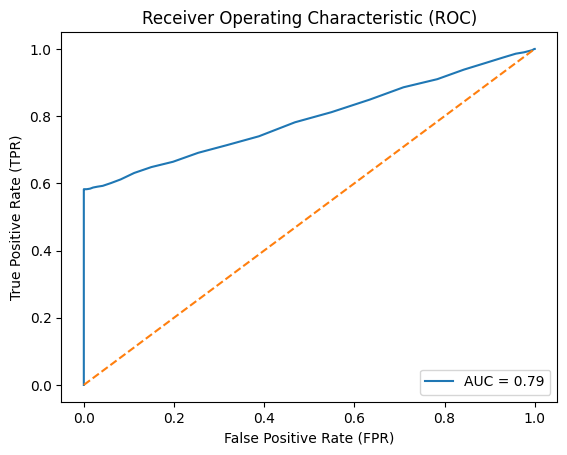

In [338]:
plt.plot(fpr,tpr,label= 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'--')  # plot a diagonal line from the lower left to the upper right
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

<h4>QDA

In [339]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(train_X, train_y)

pred_test_qda = qda_model.predict(X_test)

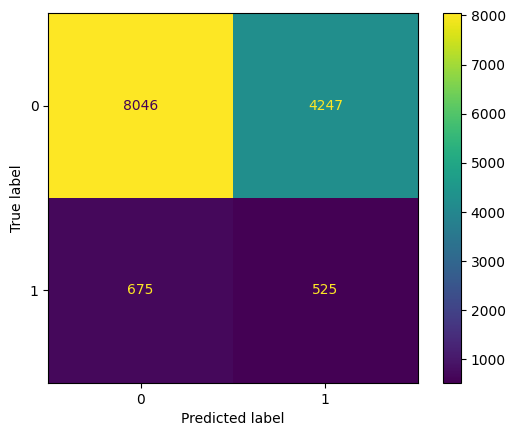

In [340]:
# confusion matrix 
y_pred = qda_model.predict(X_test)
cm_test_qda_model = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_test_qda_model, display_labels = qda_model.classes_)
cm_display.plot();

In [341]:
# F1 score
f1_score_qdamodel = f1_score(y_test, y_pred)
# precision
precision_qdamodel = precision_score(y_test, y_pred)
# recall
recall_qdamodel = recall_score(y_test, y_pred)
# accruacy
accuracy_qdamodel = qda_model.score(X_test, y_test)

In [342]:
y_train_test_prob = qda_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_train_test_prob[:,1], pos_label=1)
roc_auc =  auc(fpr, tpr)
roc_auc

0.5549749179749993

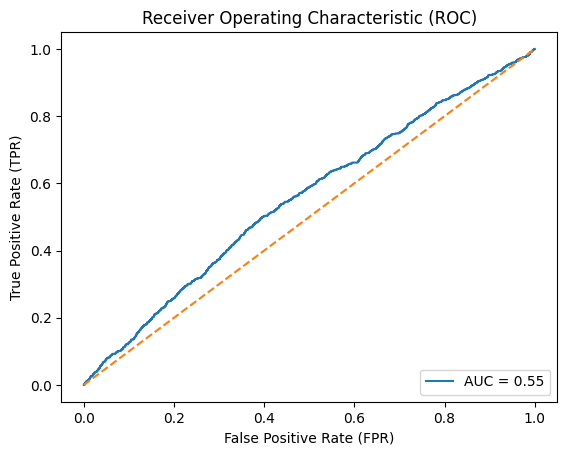

In [343]:
plt.plot(fpr,tpr,label= 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'--')  # plot a diagonal line from the lower left to the upper right
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

<h4> KNN

In [353]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=4)

knn_model.fit(train_X, train_y)
pred_test_knn = knn_model.predict(X_test)

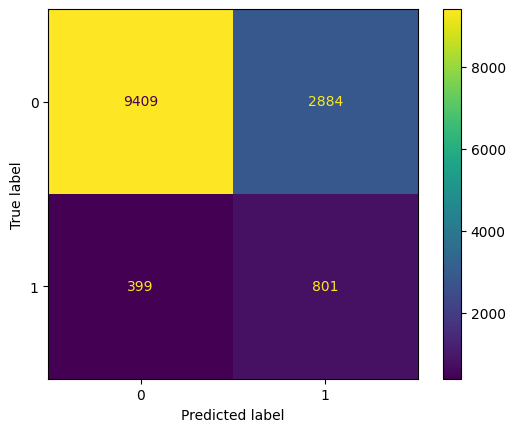

In [354]:
# confusion matrix 
y_pred = knn_model.predict(X_test)
cm_test_knn_model = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_test_knn_model, display_labels = knn_model.classes_)
cm_display.plot();

In [355]:
# F1 score
f1_score_knnmodel = f1_score(y_test, y_pred)
# precision
precision_knnmodel = precision_score(y_test, y_pred)
# recall
recall_knnmodel = recall_score(y_test, y_pred)
# accruacy
accuracy_knnmodel = knn_model.score(X_test, y_test)

In [356]:
y_train_test_prob = knn_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_train_test_prob[:,1], pos_label=1)
roc_auc =  auc(fpr, tpr)
roc_auc

0.7493172266059276

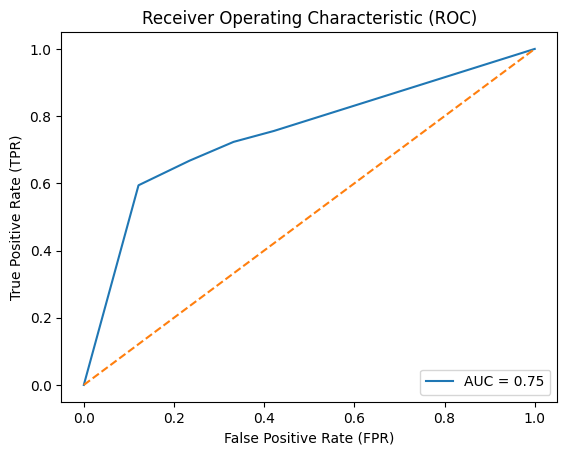

In [357]:
plt.plot(fpr,tpr,label= 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'--')  # plot a diagonal line from the lower left to the upper right
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()